In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
df = pd.read_csv("housing.csv", header = None, delimiter = r"\s+")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.columns = [
    "CRIM",                                   #per capita crime rate by town
    "ZN",                                     #proportion of residential land zoned for lots over 25.000 sq.ft
    "INDUS",                                  #proportion of non-retail business acres per town
    "CHAS",                                   #Charles river dummy
    "NOX",                                    #nitric oxides concentration (parts per 10 million)
    "RM",                                     #average number of rooms per dwelling
    "AGE",                                    #proportion of owner-occupied units built prior to 1940
    "DIS",                                    #weighted distances to five Boston employment centres
    "RAD",                                    #index of accessibility to radial highways
    "TAX",                                    #full-value property-tax rate per $10,000
    "PTRATIO",                               #pupil-teacher ratio by town
    "B",                                      #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT",                                  #% lower status of the population
    "MEDV"                                    #Median value of owner-occupied homes in $1000's
]
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors = "coerce")

print(df.dtypes)
df.describe()

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


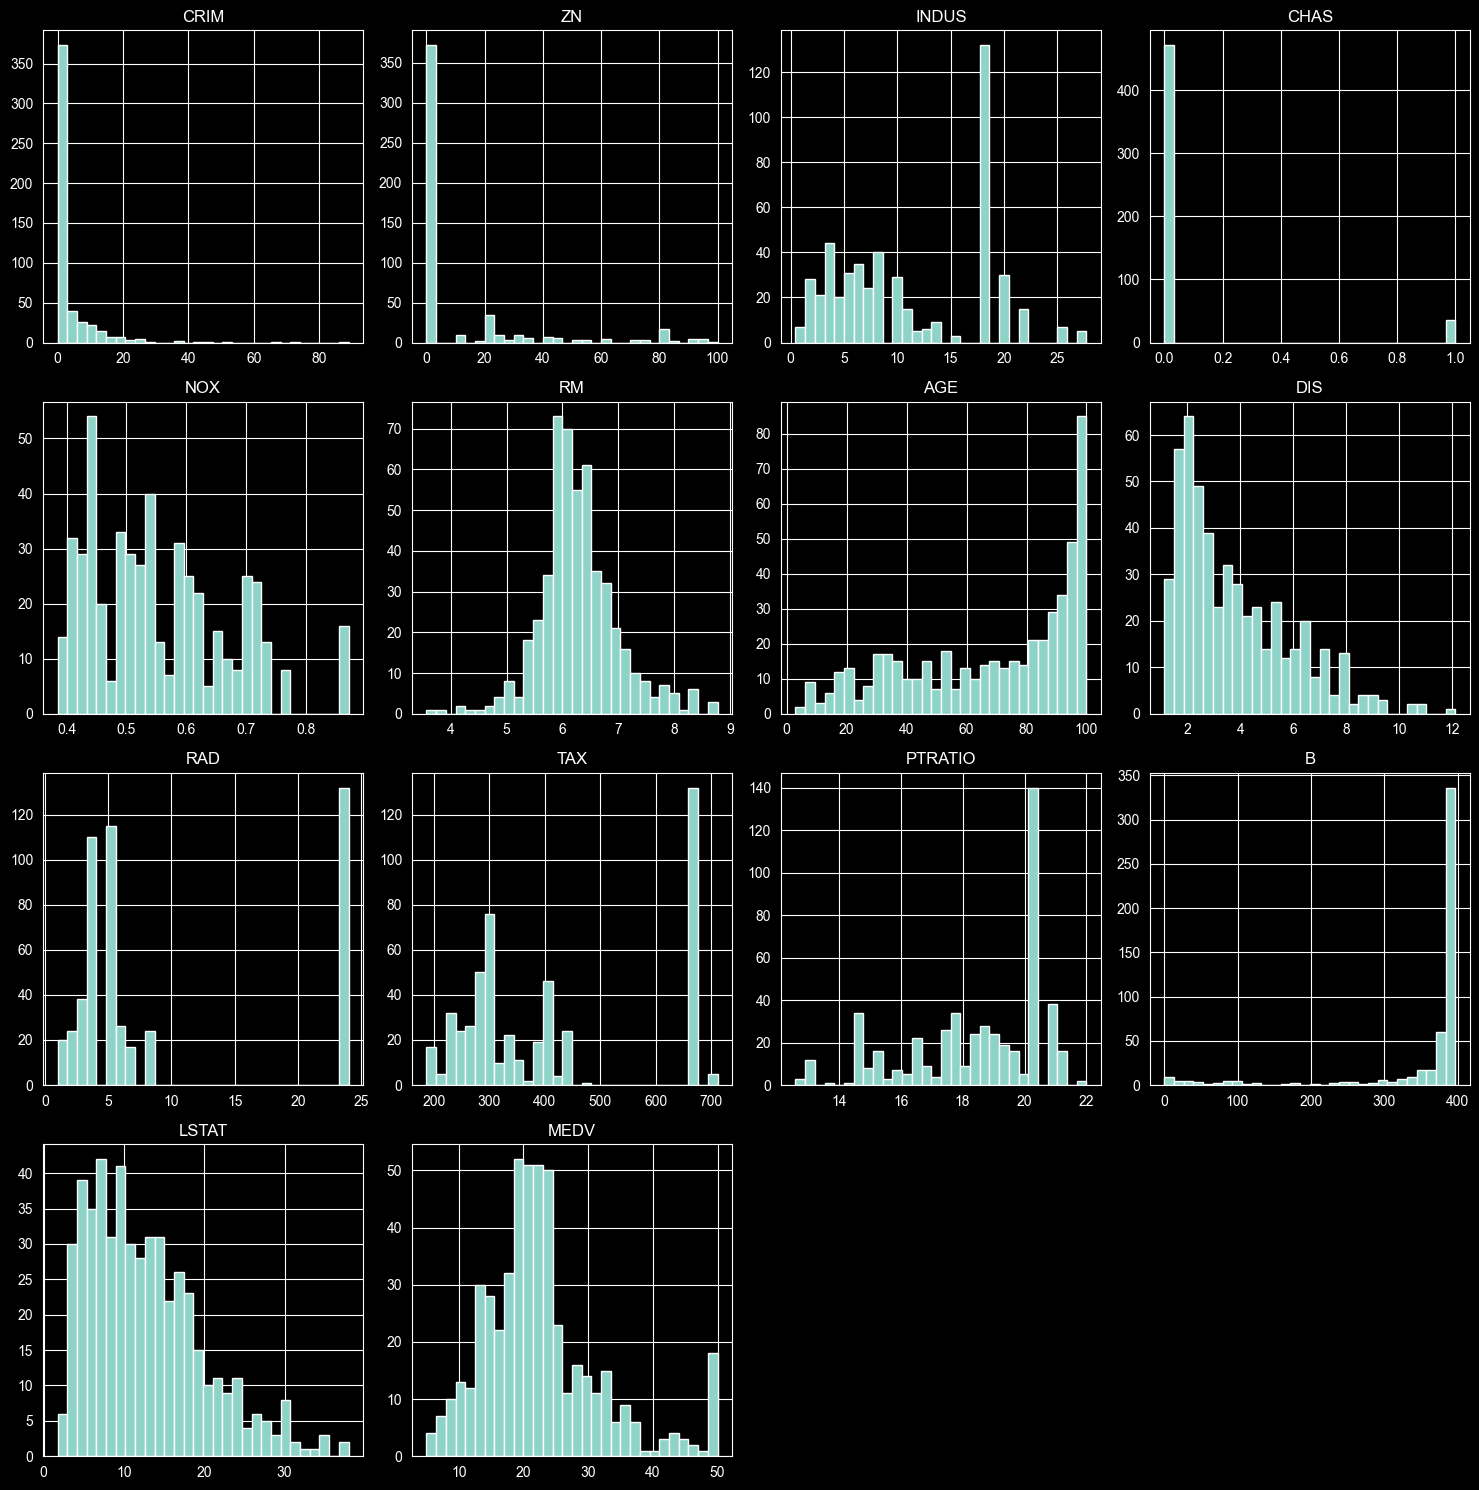

In [9]:
df.hist(bins = 30, figsize = (15,15))
plt.tight_layout()
plt.show()

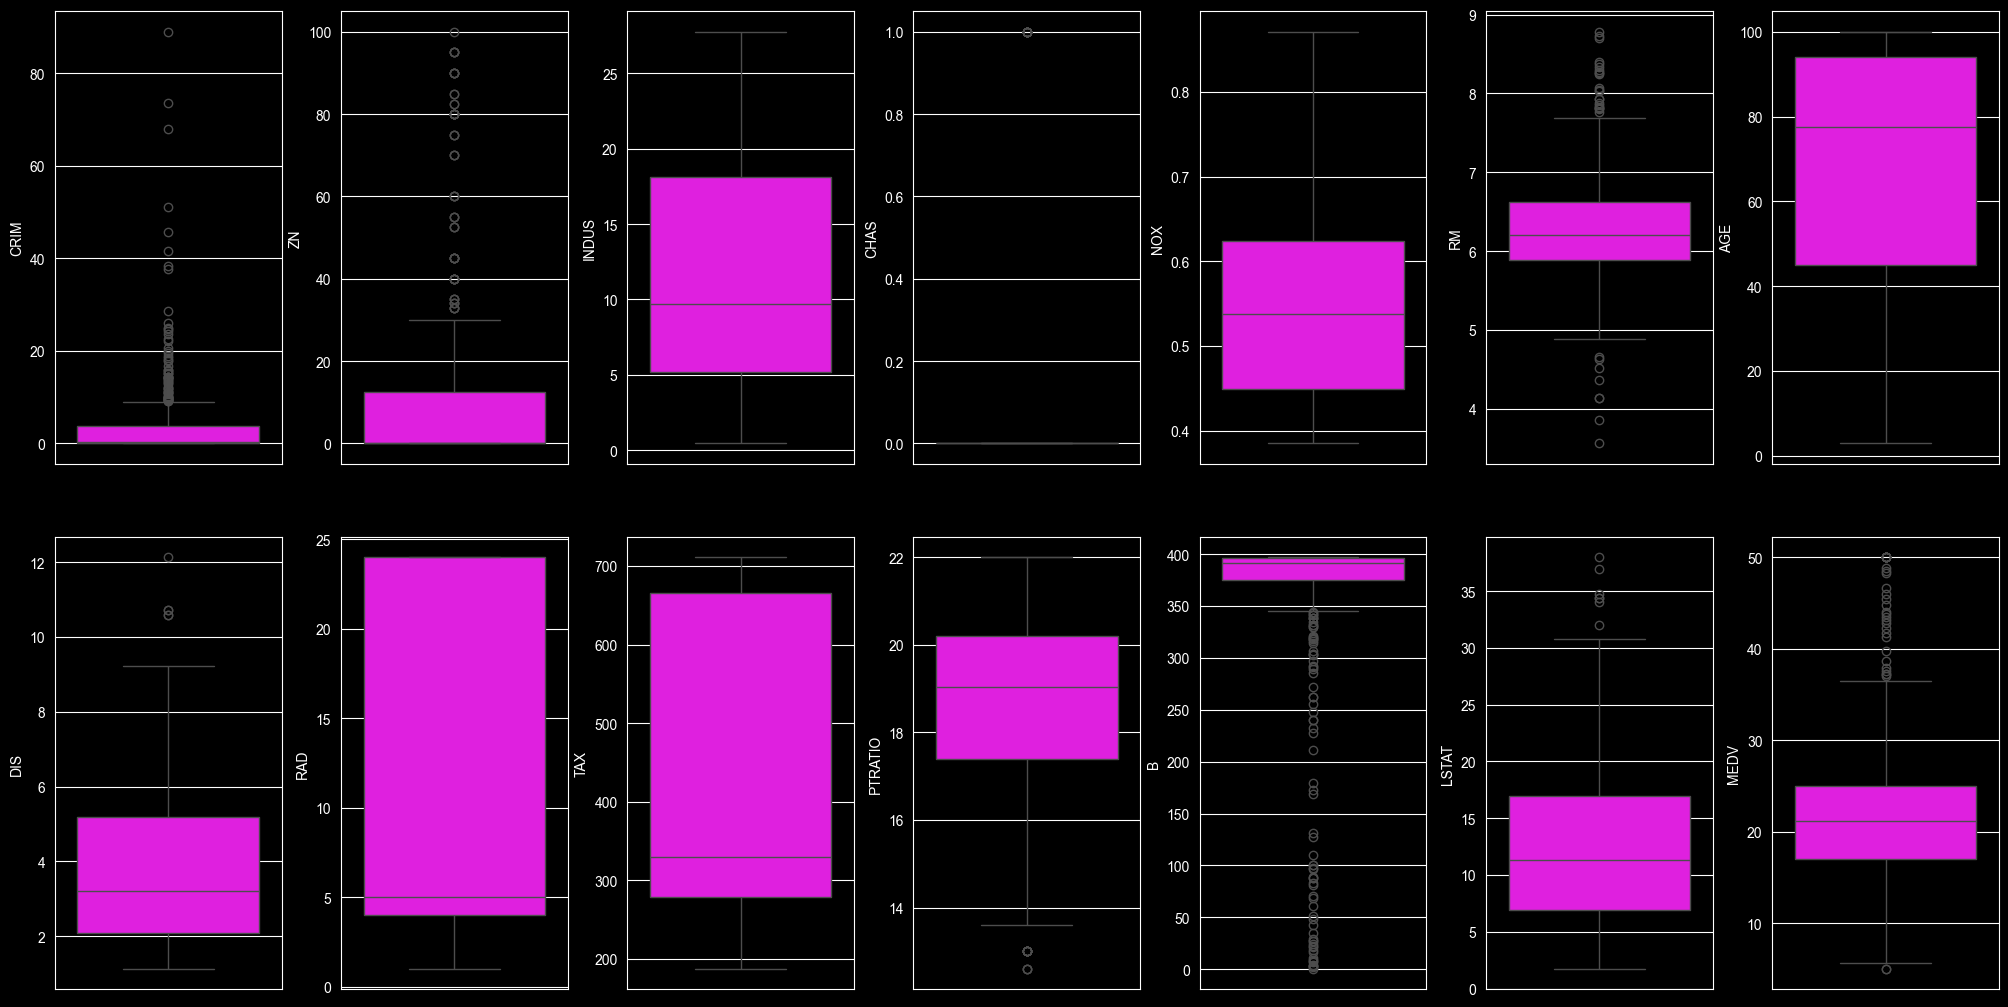

In [10]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color= "magenta")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
df = df[df["MEDV"] != 50]
df.shape

(490, 14)

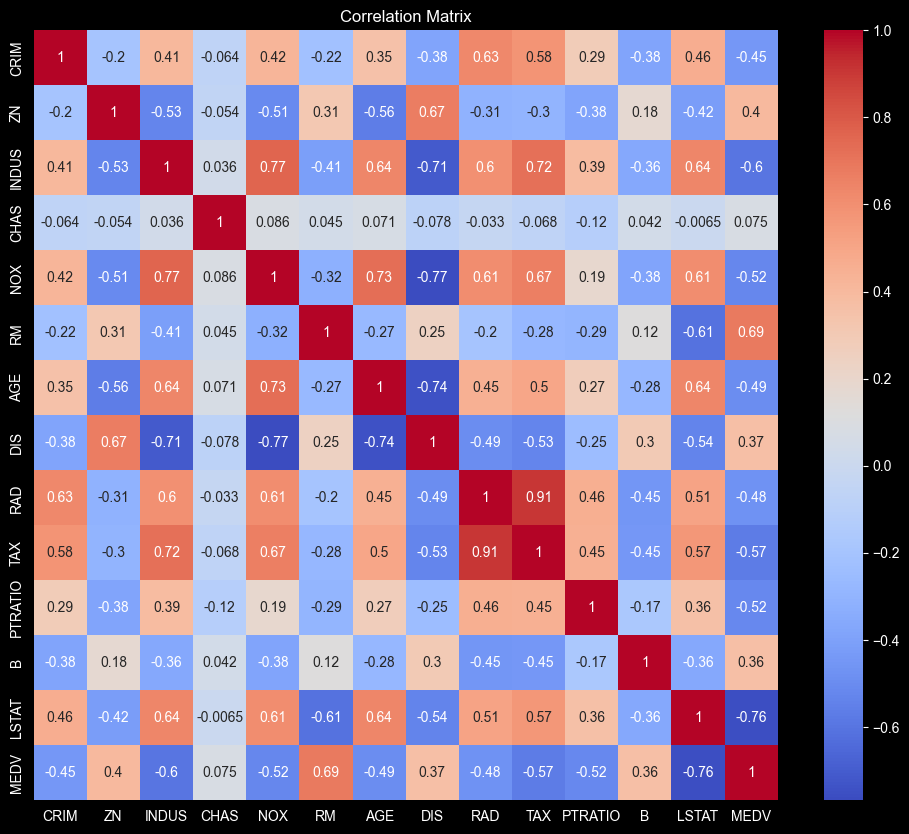

In [12]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

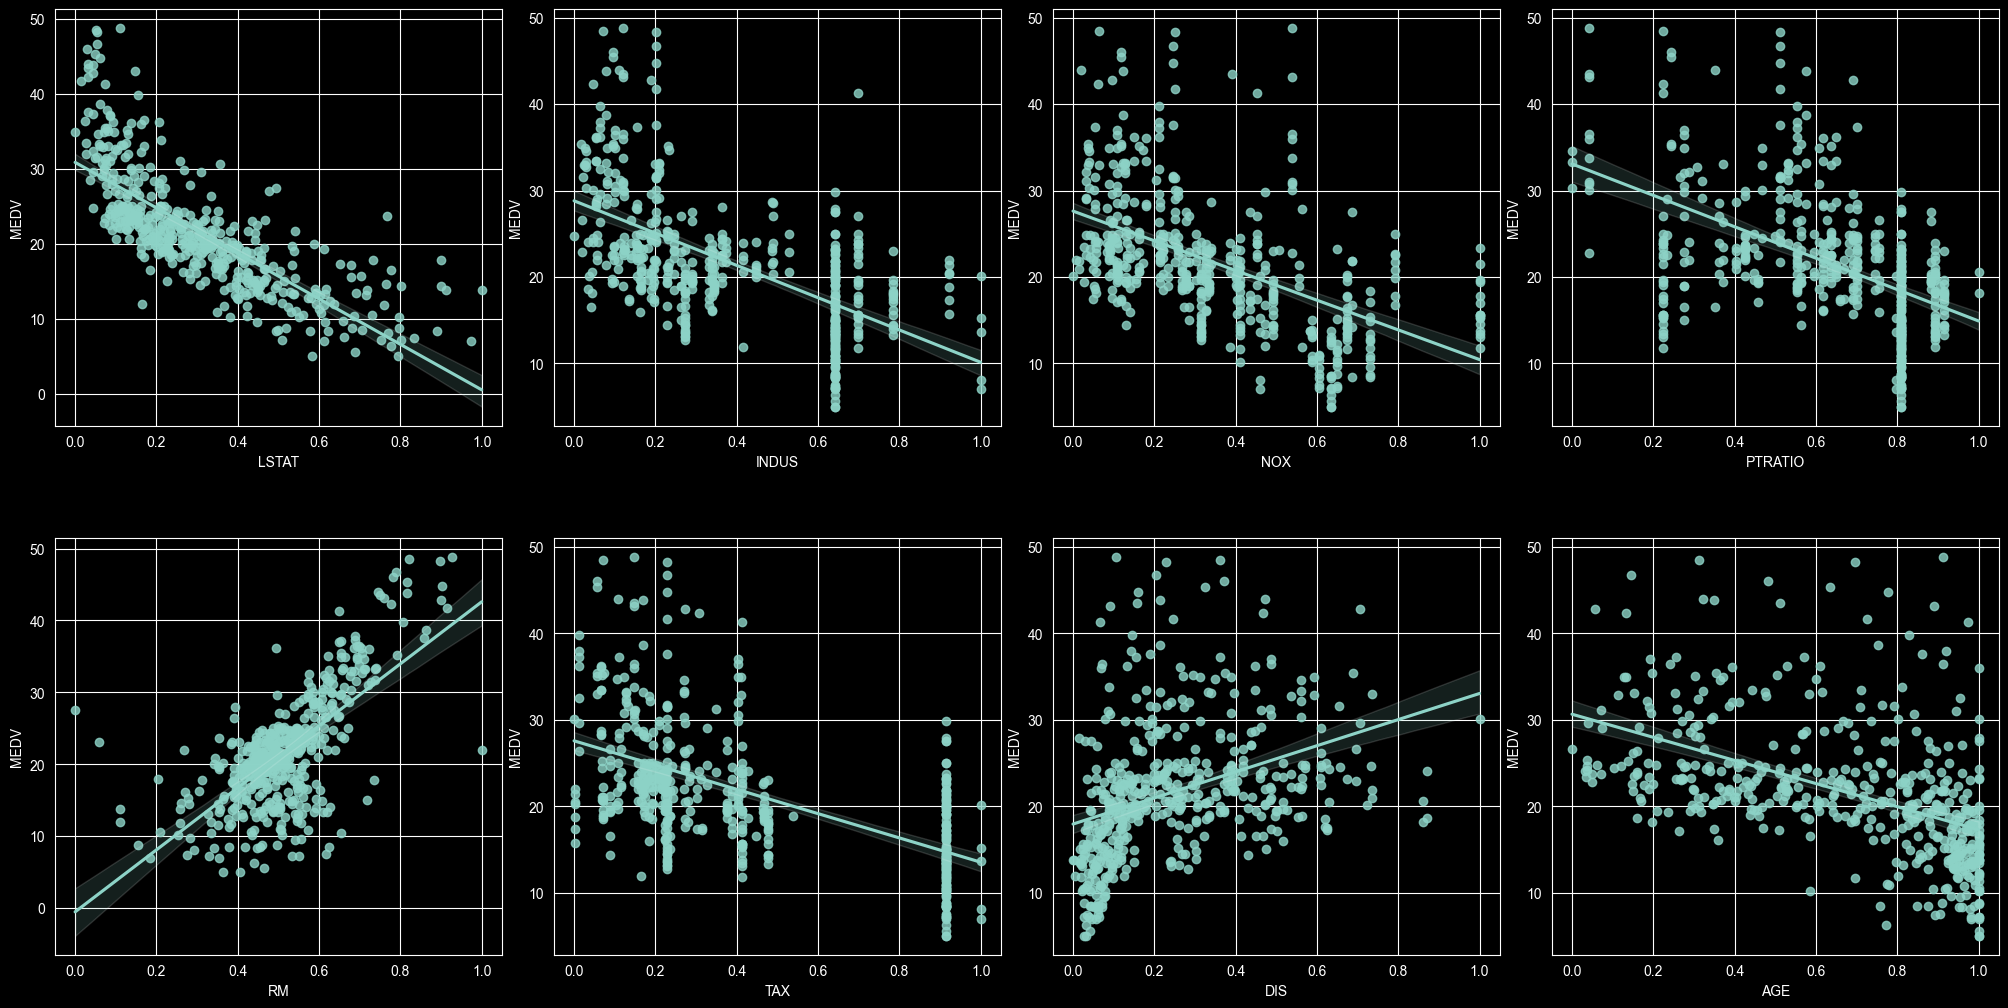

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x1 = df[[c for c in df.columns if c != "MEDV"]]
y1 = df["MEDV"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x1, y1, test_size = 0.2, random_state = 42
)

model1 = LinearRegression()
model1.fit(x_train1, y_train1)

y_pred1 = model1.predict(x_test1)
model1_r2score = r2_score(y_test1, y_pred1)
model1_mse = mean_squared_error(y_test1, y_pred1)
print("R²:", model1_r2score)
print("MSE:", model1_mse)
print(y_pred1)

R²: 0.764004725802856
MSE: 12.0559028663876
[16.12239564 25.23966255 16.14392236  8.34035519 11.82559693 19.83849099
 13.30770491 34.88554673 18.96406315 28.01592205 19.72609699 20.12486846
  6.96934331 15.76652033 17.15356597 25.5895597  17.09697975 17.26279473
 11.8303314  22.17193338 21.26131888 25.28235897 12.56170465 30.84763487
 22.21048187 22.99567352 20.16952422 32.31849507 33.5532066  15.61326061
 24.92093383 15.57439536 25.38115672 23.15472956 15.39380053 24.59561927
 29.35395794 21.79802748 31.40136699 29.45492121 15.06945326 18.39849609
 13.23001341 17.86071564 18.60608172 28.41391941 17.67977751 16.70488727
 20.67523653 19.61943804 17.3676733  30.62717699 28.23579377 20.65741609
 18.39896235 24.80826483 17.81855562 28.07908519 22.15963999 12.14967879
 23.56286226 17.83413066 23.31643734 23.11295229 23.04145524 36.33098877
 26.90688199 27.89830672 10.51707735 19.96521238 14.20839753 21.04645094
 16.49247801 21.05203483 12.89032849 22.24010827 23.23406668 20.61904633
 26.047

In [15]:
from sklearn.linear_model import Ridge
x2 = df[[c for c in df.columns if c != "MEDV"]]
y2 = df["MEDV"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y2, test_size = 0.2, random_state = 42
)

model2 = Ridge()
model2.fit(x_train2, y_train2)

y_pred2 = model2.predict(x_test2)
model2_r2score = r2_score(y_test2, y_pred2)
model2_mse = mean_squared_error(y_test2, y_pred2)
print("R²:", model2_r2score)
print("MSE:", model2_mse)
print(y_pred2)


R²: 0.7598365014314934
MSE: 12.268838097050223
[15.78897188 25.17958147 16.36838366  7.821267   12.12038954 19.80823984
 13.411808   35.0129523  19.0819819  27.83683081 19.67370431 19.8053979
  7.25114206 15.31875525 17.08329751 25.4114562  17.43210258 17.62407345
 12.0142979  21.77982435 20.80553022 25.23338292 12.91304773 31.133292
 21.58356349 22.50719703 21.11927747 32.18525154 33.41030419 15.62789772
 24.94556355 15.18725144 25.72944817 23.7176201  15.47493628 24.41086729
 29.54982424 21.74623015 31.34564925 29.5611302  15.34872901 17.91420373
 12.88508535 18.83075023 18.41451861 28.20836223 18.04554251 17.01655014
 20.78946496 19.80171731 17.69233266 30.74114037 28.13390142 20.69247083
 19.4046944  24.61977006 17.48542193 27.81015206 22.47050108 13.07164217
 23.86031767 18.15105157 23.56697213 23.22167758 23.46282403 36.09562722
 26.83561051 27.78214041 10.03341359 19.60180629 14.56204647 20.91254699
 16.57724519 20.92099679 12.42149579 21.82487004 23.21973878 20.792317
 26.00696

In [17]:
from sklearn.ensemble import RandomForestRegressor

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    x1, y1, test_size = 0.2, random_state = 42
)

model3 = RandomForestRegressor(n_estimators = 200, random_state = 42)
model3.fit(x_train3, y_train3)

y_pred3 = model3.predict(x_test3)
model3_r2score = r2_score(y_test3, y_pred3)
model3_mse = mean_squared_error(y_test3, y_pred3)

print("R²:", model3_r2score)
print("MSE:", model3_mse)
print(y_pred3)



R²: 0.8831301080724238
MSE: 5.970340168367351
[15.384  22.182  15.1915 12.71   10.183  19.9045 15.0855 44.4525 20.44
 26.8395 19.6885 19.322   9.5945 19.7895 12.013  24.1975 15.163  15.201
 16.997  20.6385 20.789  25.272   8.768  33.97   21.174  22.089  17.0055
 32.6125 34.0155 12.7005 25.9475 15.663  24.8355 22.717  15.1165 24.145
 28.2    21.038  32.5685 32.607  14.0095 17.0395 13.2665 16.1785 19.539
 22.43   19.304  15.671  21.2695 21.1945 14.548  28.426  23.507  20.825
 17.378  23.4075 14.8775 23.9035 20.0335 13.9015 23.7945 15.7215 25.587
 22.2115 29.09   43.051  22.2985 25.7895 13.479  20.843  11.514  20.222
 18.8375 21.9745 17.09   21.588  21.5995 20.9215 23.228  19.609  23.8015
 25.942  12.405  18.8895 20.653  26.8335 20.6475 23.3995 10.5665 20.285
 21.306  12.456  20.003  20.601  10.31   22.726  20.5915  9.6215]


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
x_train4, x_test4, y_train4, y_test4 = train_test_split(
    x1, y1, test_size = 0.2, random_state = 42
)

model4 = GradientBoostingRegressor(
    n_estimators = 200,
    learning_rate = 0.05,
    random_state = 42,
    max_depth = 5,
)

model4.fit(x_train4, y_train4)

y_pred4 = model4.predict(x_test4)
model4_r2score = r2_score(y_test4, y_pred4)
model4_mse = mean_squared_error(y_test4, y_pred4)

print("R²:", model4_r2score)
print("MSE:", model4_mse)
print(y_pred4)


R²: 0.8890371153180077
MSE: 5.668578593581254
[15.51530992 22.52067905 14.85674236 10.73682903 11.43460266 19.90623976
 13.27191597 46.63718599 20.70736315 27.05803193 19.85421734 19.4261102
  9.76538842 20.88683088 12.56921617 24.6821541  16.84252661 16.09189456
 14.97647221 20.76500258 20.7505365  27.06281611  9.98311645 35.07079886
 20.92644588 22.38700338 17.3156731  31.94486689 34.45088383 10.84549588
 26.47480092 16.9344011  24.64548052 21.85848519 14.75071948 24.41093825
 28.15778018 21.11173038 33.35004543 32.84924228 14.19825542 16.39970684
 12.26103847 16.53515676 19.34927718 22.35640111 19.83442813 15.44642678
 20.9785982  21.64289214 14.91643981 28.59191993 23.45769801 20.64385343
 16.85518334 23.78522795 16.60456306 23.38186464 20.33710911 13.73767972
 24.39392387 15.98926374 25.71777204 22.21389321 27.35706416 39.571818
 22.44235406 24.69325905 15.00649071 20.79124618 11.63416047 20.13401869
 17.22898366 21.46619544 15.87847712 21.87886578 20.89676506 20.81706286
 22.8495